## Covid-19 Cases & Deaths Analysis

Data available here:
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [143]:
#import sys
#!{sys.executable} -m pip install countrygroups
#!{sys.executable} -m pip install geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from countrygroups import EUROPEAN_UNION
import itertools
import matplotlib.ticker as mtick
#import os
#os.getcwd()

### Read in and explore data

In [144]:
df=pd.read_csv('Covid_cases_deaths.csv')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   dateRep                                          9577 non-null   object 
 1   year_week                                        9537 non-null   object 
 2   cases_weekly                                     9537 non-null   float64
 3   deaths_weekly                                    9537 non-null   float64
 4   countriesAndTerritories                          9537 non-null   object 
 5   geoId                                            9494 non-null   object 
 6   countryterritoryCode                             9516 non-null   object 
 7   popData2019                                      9516 non-null   float64
 8   continentExp                                     9537 non-null   object 
 9   notification_rate_per_100000_p

In [146]:
df.describe()

cases_weekly  deaths_weekly   popData2019  \
count  9.537000e+03    9537.000000  9.516000e+03   
mean   8.863645e+03     193.519346  4.069945e+07   
std    5.284121e+04     895.786026  1.520372e+08   
min   -3.864000e+03    -875.000000  8.150000e+02   
25%    8.000000e+00       0.000000  1.324820e+06   
50%    1.630000e+02       2.000000  7.813207e+06   
75%    2.289000e+03      36.000000  2.851583e+07   
max    1.588085e+06   18574.000000  1.433784e+09   

       notification_rate_per_100000_population_14-days  
count                                      9305.000000  
mean                                         74.936082  
std                                         180.393541  
min                                        -132.600000  
25%                                           0.770000  
50%                                           7.270000  
75%                                          59.310000  
max                                        3447.460000

In [147]:
df[df['continentExp']=='Europe'].groupby(['continentExp', 'countriesAndTerritories'])[['cases_weekly','deaths_weekly']].sum().sort_values(by='cases_weekly', ascending=False)
df

dateRep year_week  cases_weekly  deaths_weekly  \
0     04/01/2021   2020-53         902.0           60.0   
1     28/12/2020   2020-52        1994.0           88.0   
2     21/12/2020   2020-51         740.0          111.0   
3     14/12/2020   2020-50        1757.0           71.0   
4     07/12/2020   2020-49        1672.0          137.0   
...          ...       ...           ...            ...   
9572  20/04/2020   2020-16          11.0            0.0   
9573  13/04/2020   2020-15           5.0            2.0   
9574  06/04/2020   2020-14           2.0            0.0   
9575  30/03/2020   2020-13           5.0            1.0   
9576  23/03/2020   2020-12           2.0            0.0   

     countriesAndTerritories geoId countryterritoryCode  popData2019  \
0                Afghanistan    AF                  AFG   38041757.0   
1                Afghanistan    AF                  AFG   38041757.0   
2                Afghanistan    AF                  AFG   38041757.0   
3                Afghanistan    AF                  AFG   38041757.0   
4                Afghanistan    AF                  AFG   38041757.0   
...                      ...   ...                  ...          ...   
9572                Zimbabwe    ZW                  ZWE   14645473.0   
9573                Zimbabwe    ZW                  ZWE   14645473.0   
9574                Zimbabwe    ZW                  ZWE   14645473.0   
9575                Zimbabwe    ZW                  ZWE   14645473.0   
9576                Zimbabwe    ZW                  ZWE   14645473.0   

     continentExp  notification_rate_per_100000_population_14-days  
0            Asia                                             7.61  
1            Asia                                             7.19  
2            Asia                                             6.56  
3            Asia                                             9.01  
4            Asia                                             7.22  
...           ...                                              ...  
9572       Africa                                             0.11  
9573       Africa                                             0.05  
9574       Africa                                             0.05  
9575       Africa                                             0.05  
9576       Africa                                              NaN  

[9577 rows x 10 columns]

In [148]:
#df.groupby(['continentExp'])['cases_weekly','deaths_weekly'].sum()

### Filtering & Plotting

In [149]:
df_Europe = df[df['countriesAndTerritories'].isin(EUROPEAN_UNION.names)].sort_values(by='year_week')
country_list=sorted(set(df_Europe['countriesAndTerritories']))
print(country_list)

['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


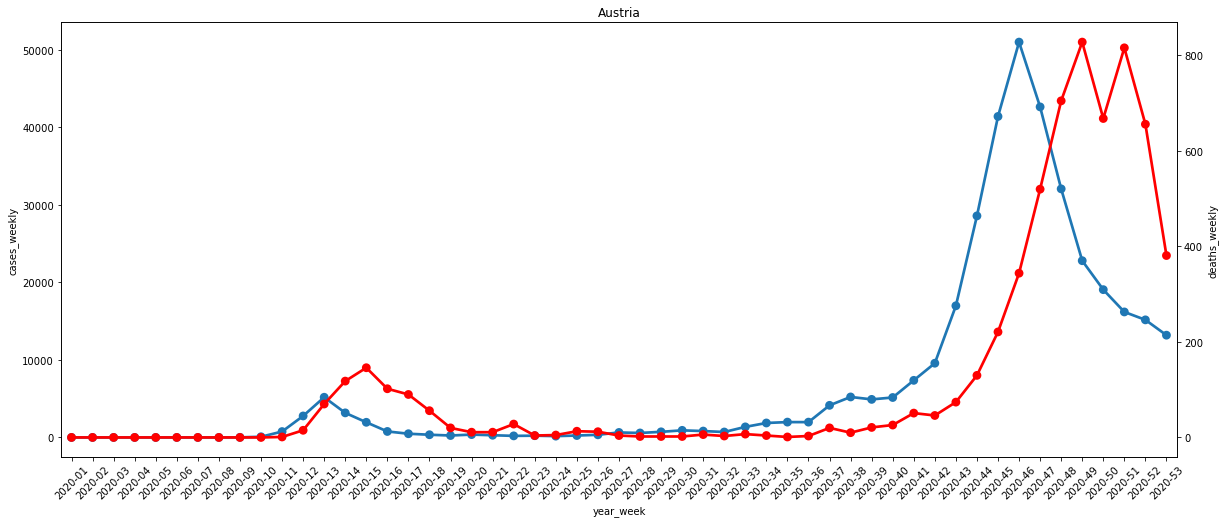

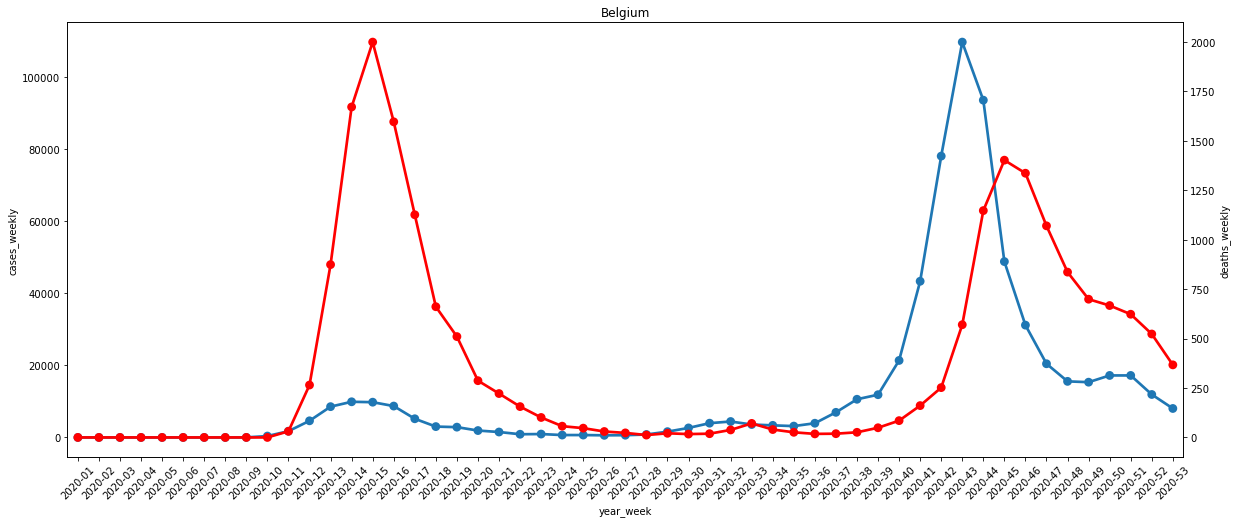

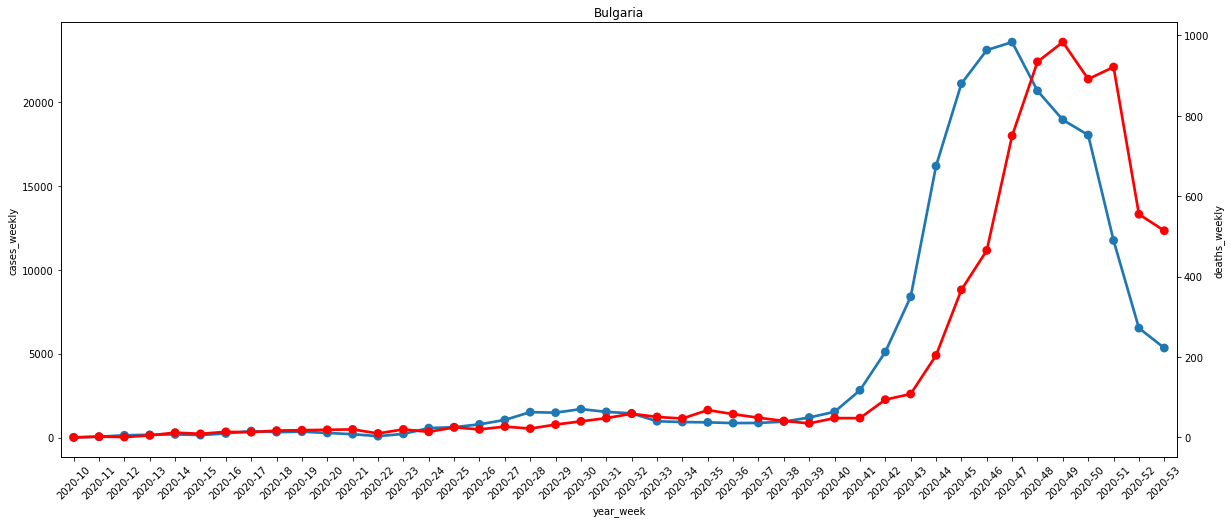

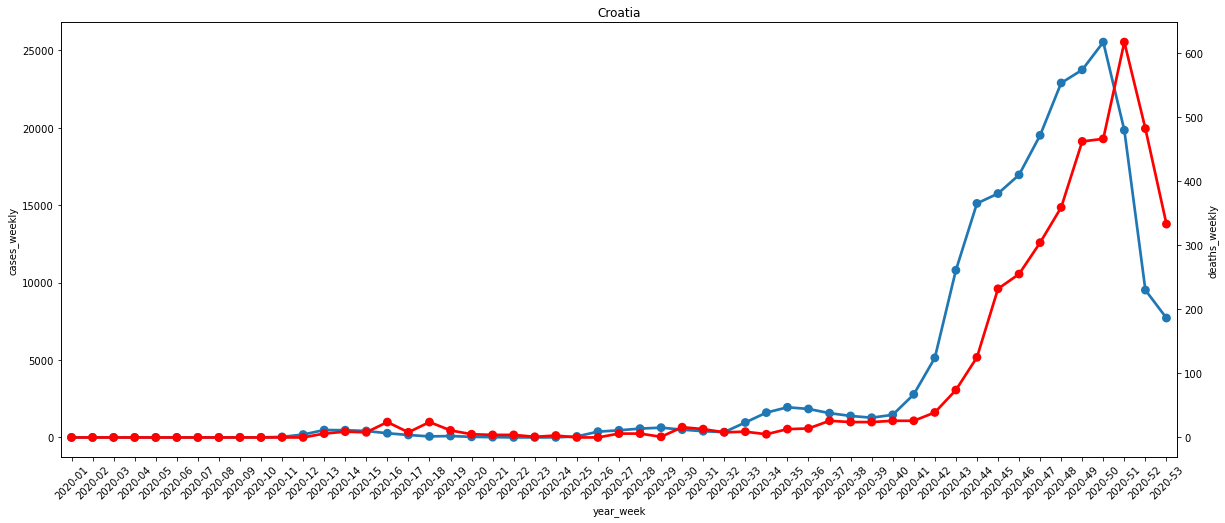

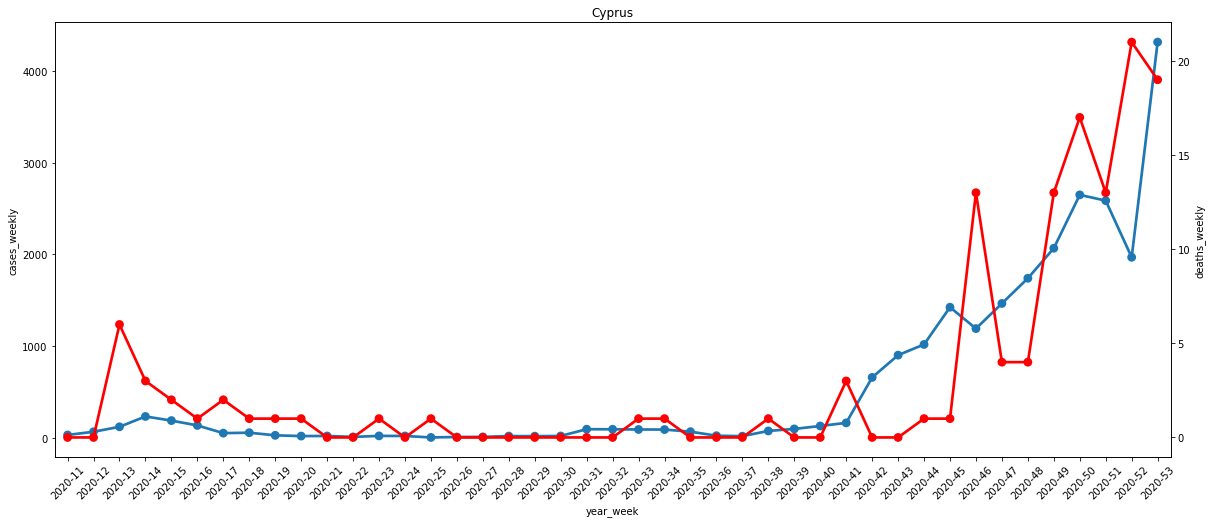

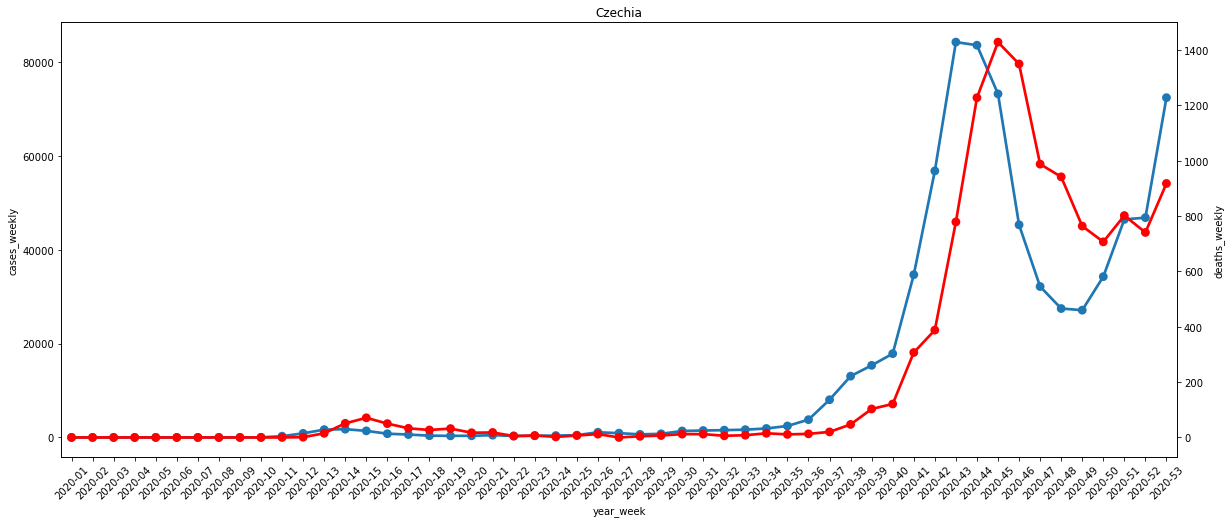

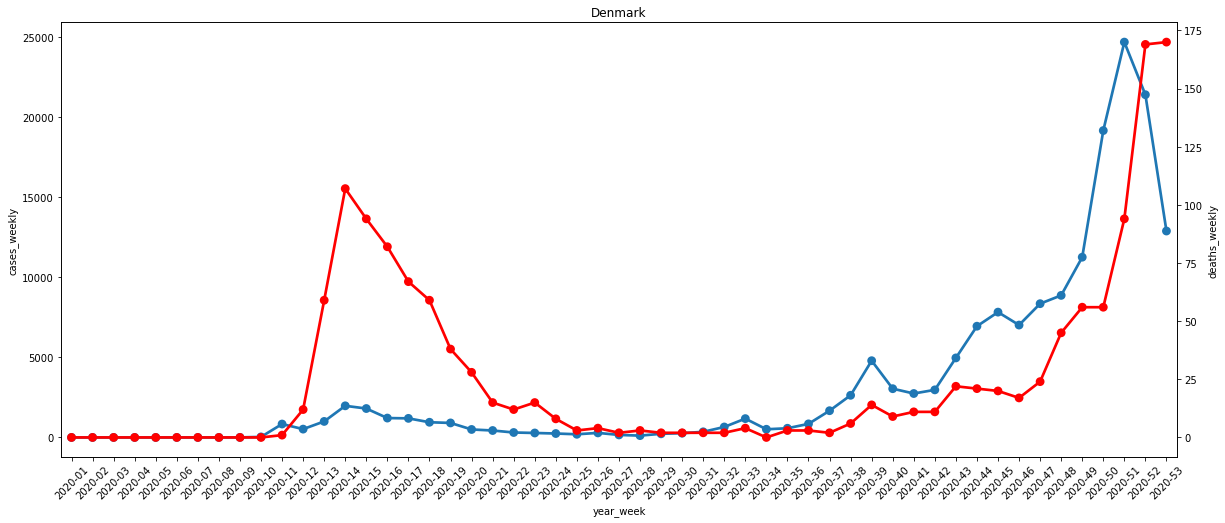

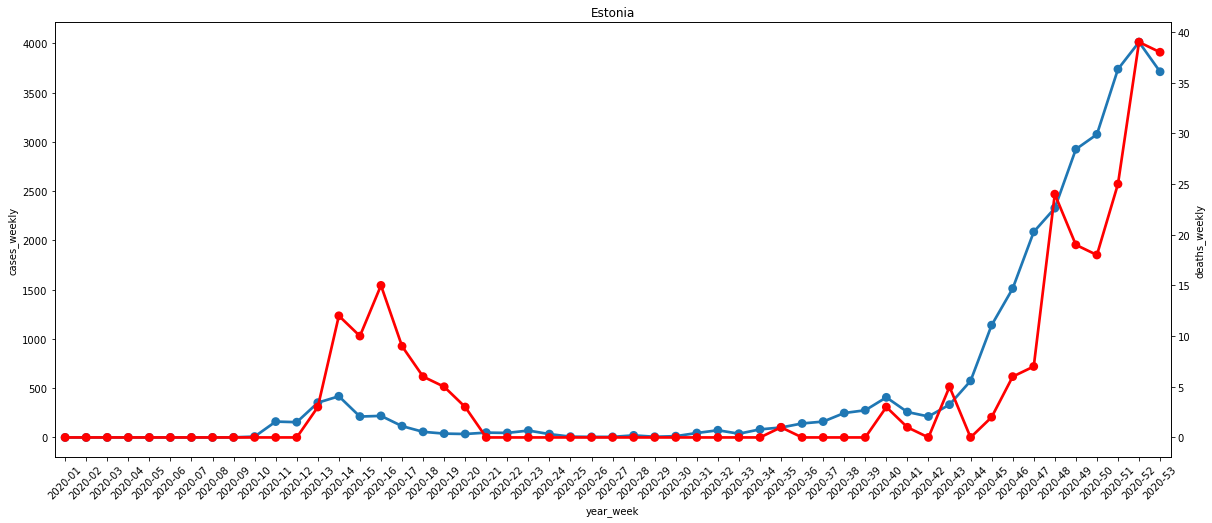

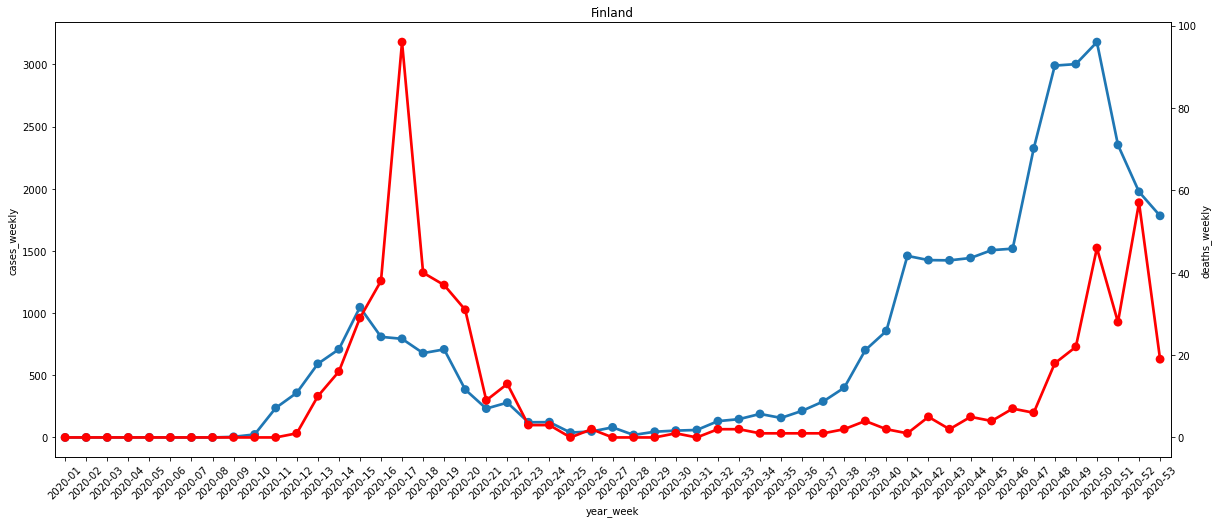

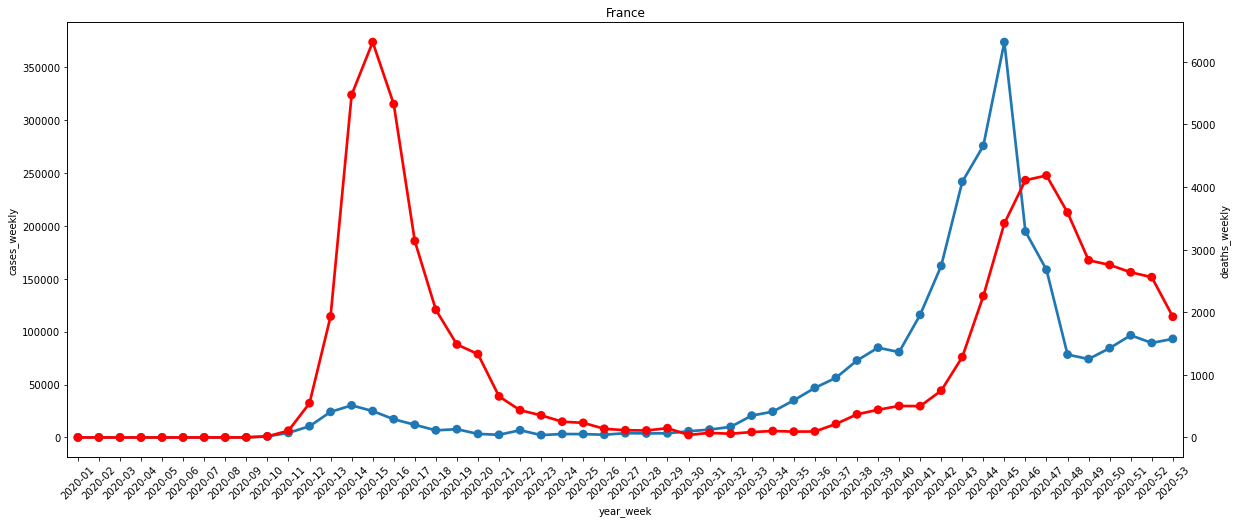

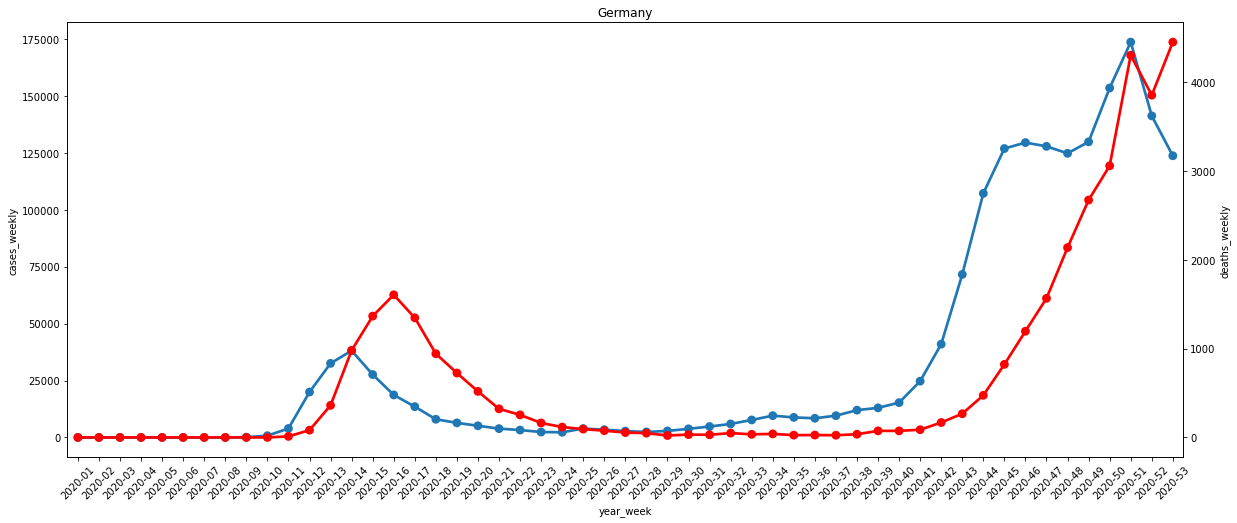

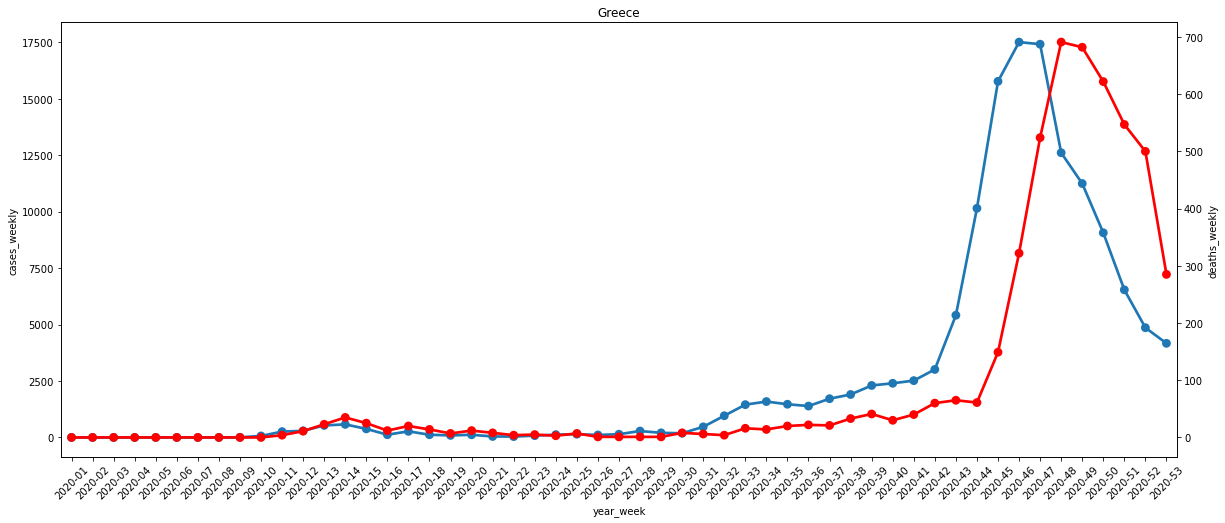

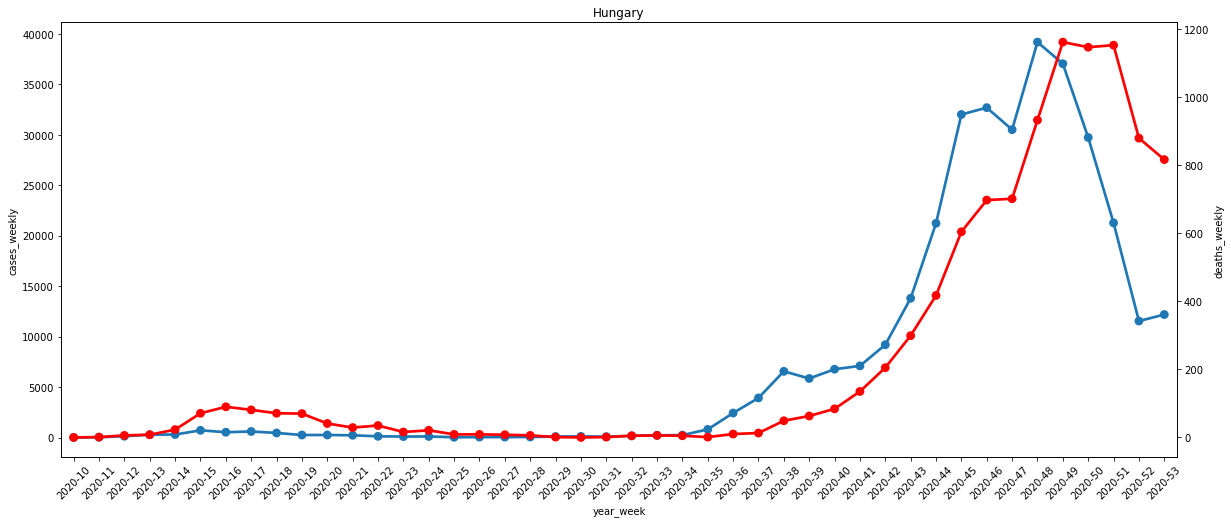

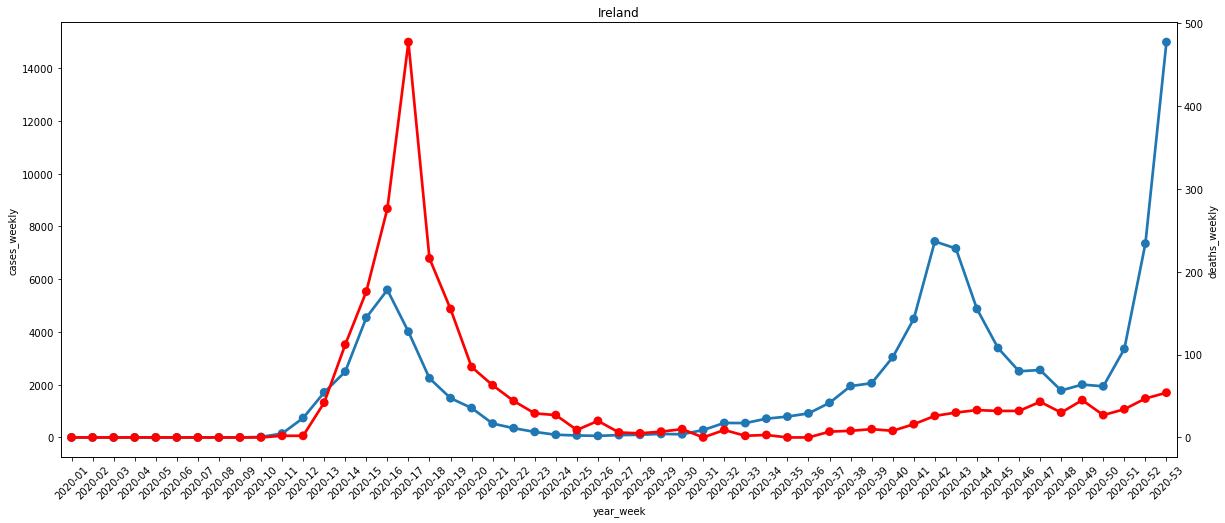

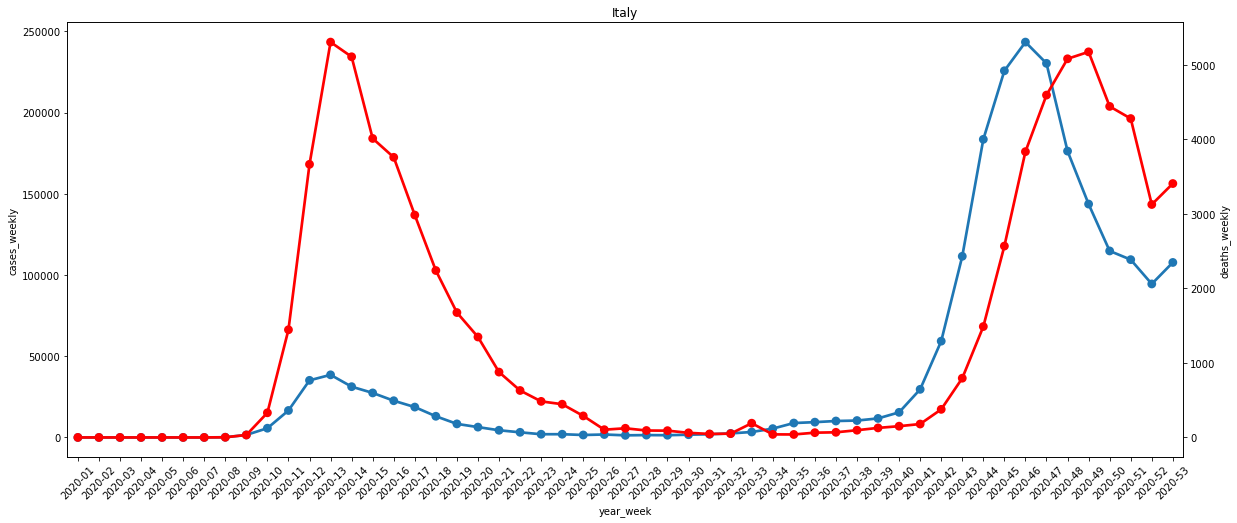

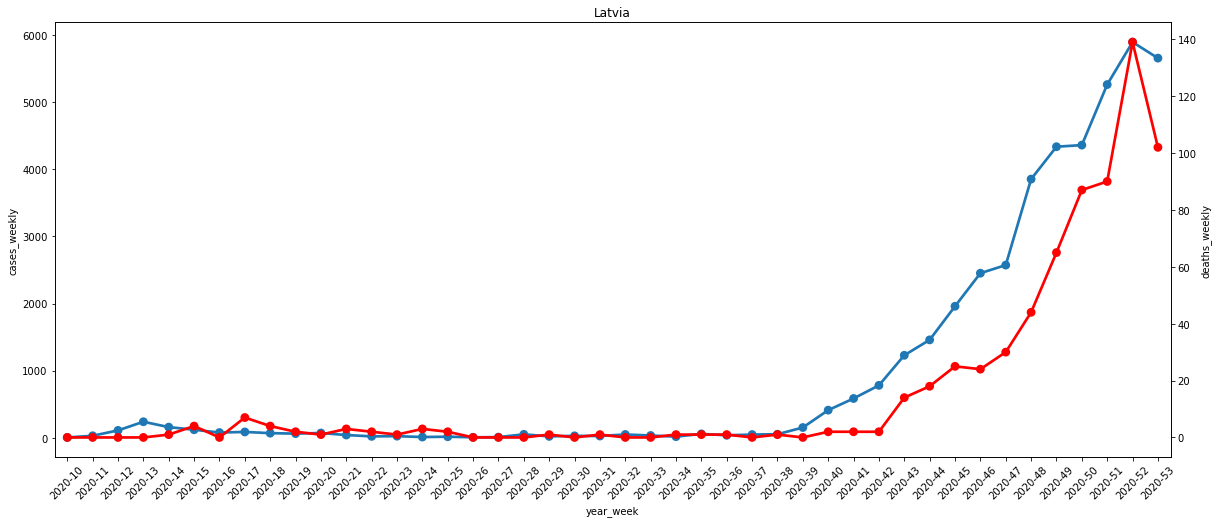

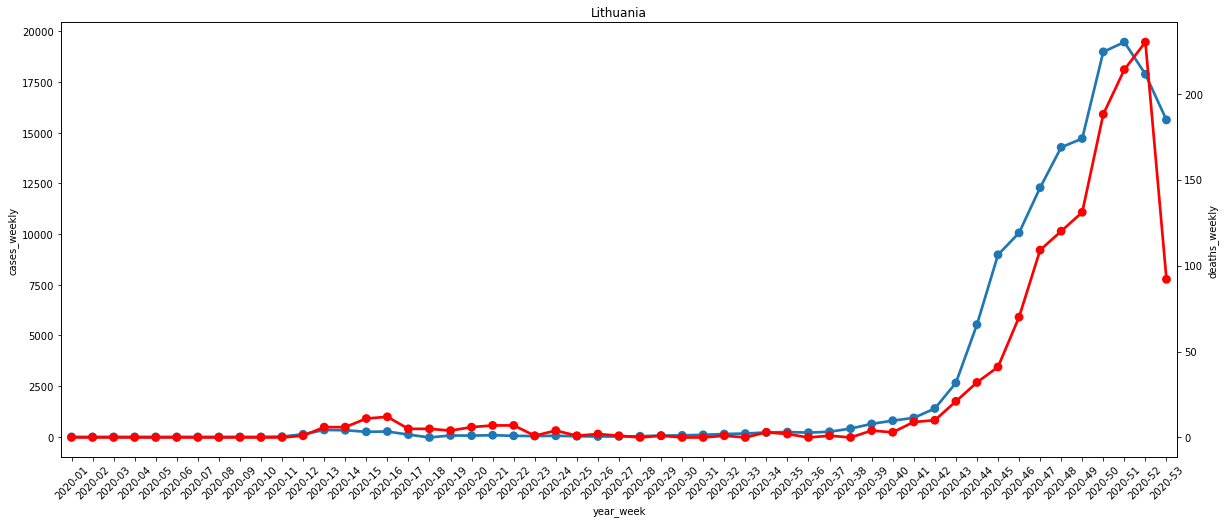

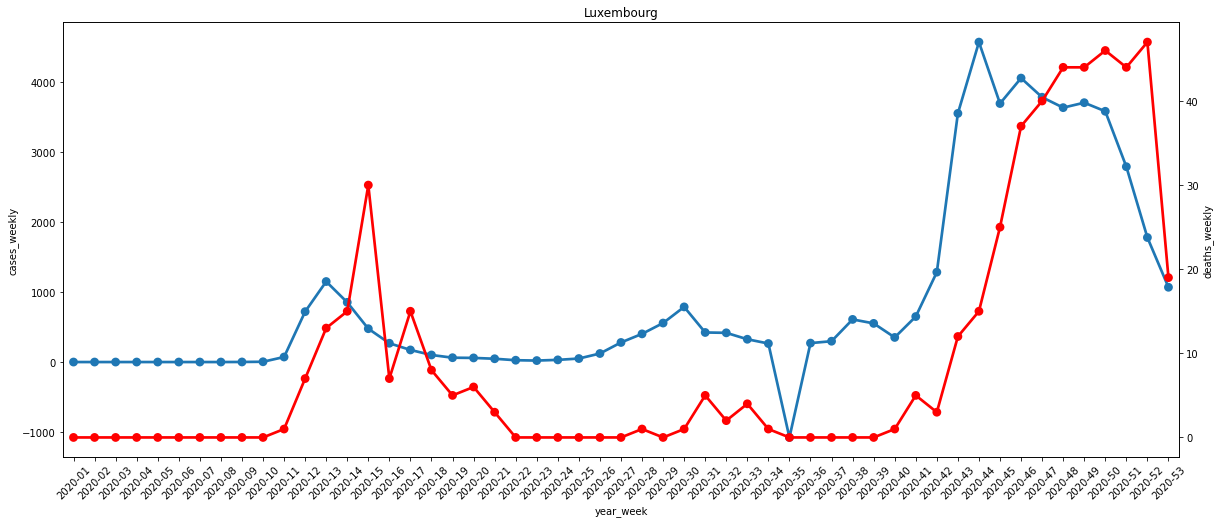

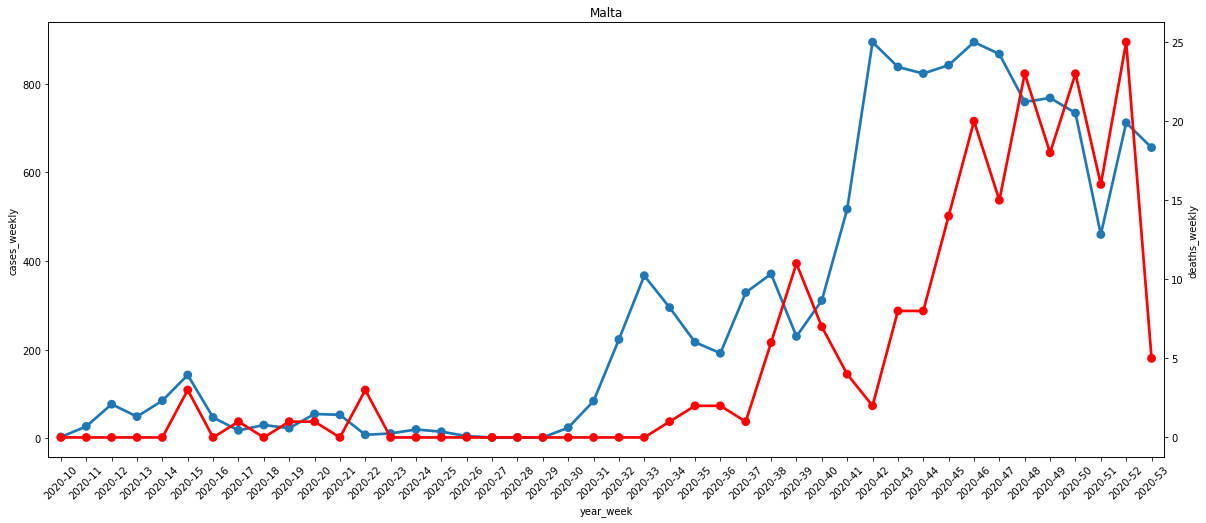

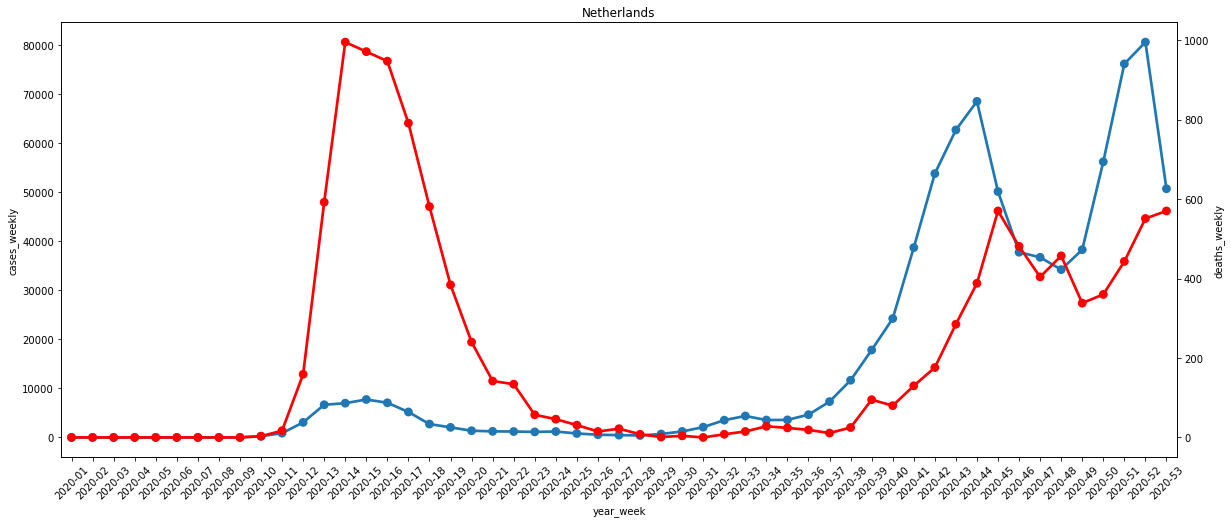

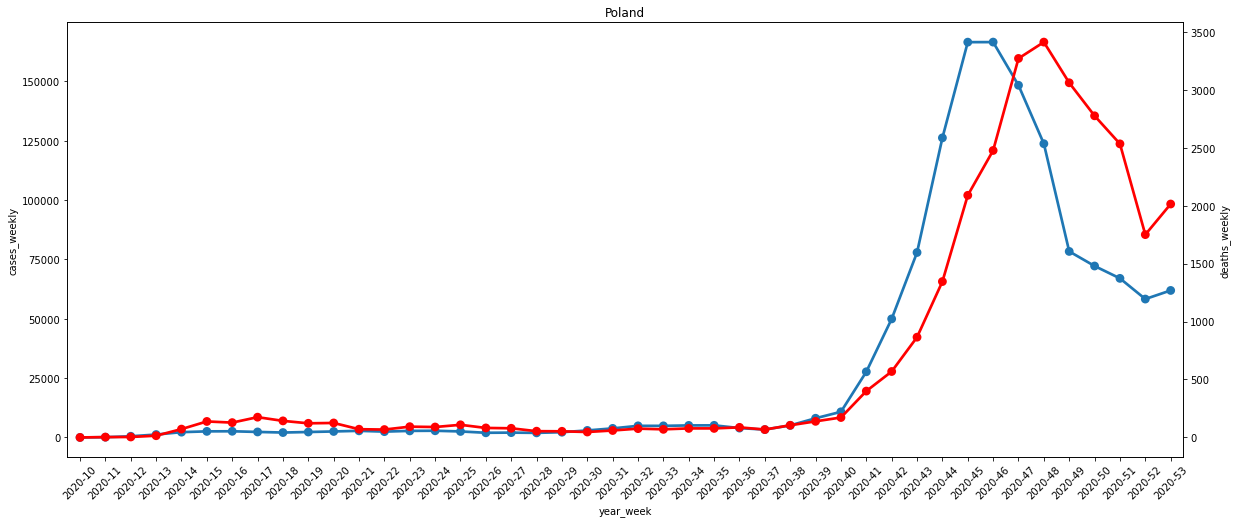

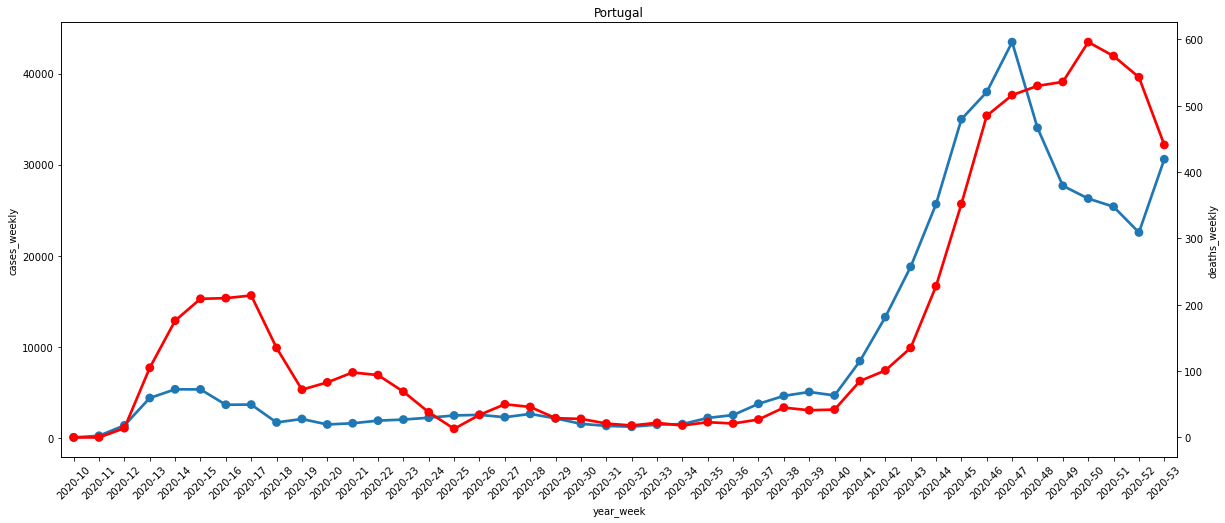

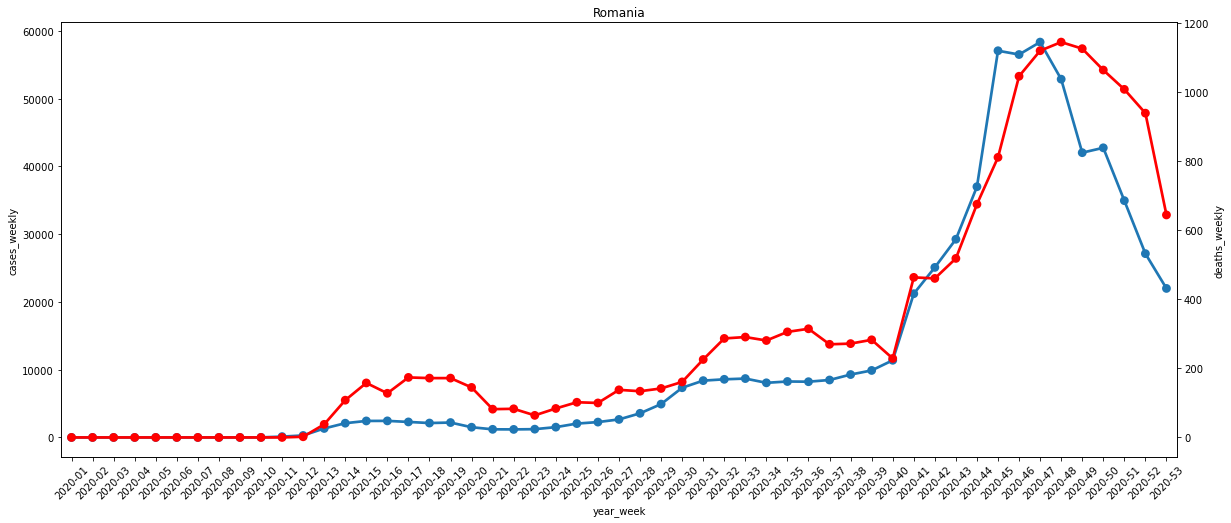

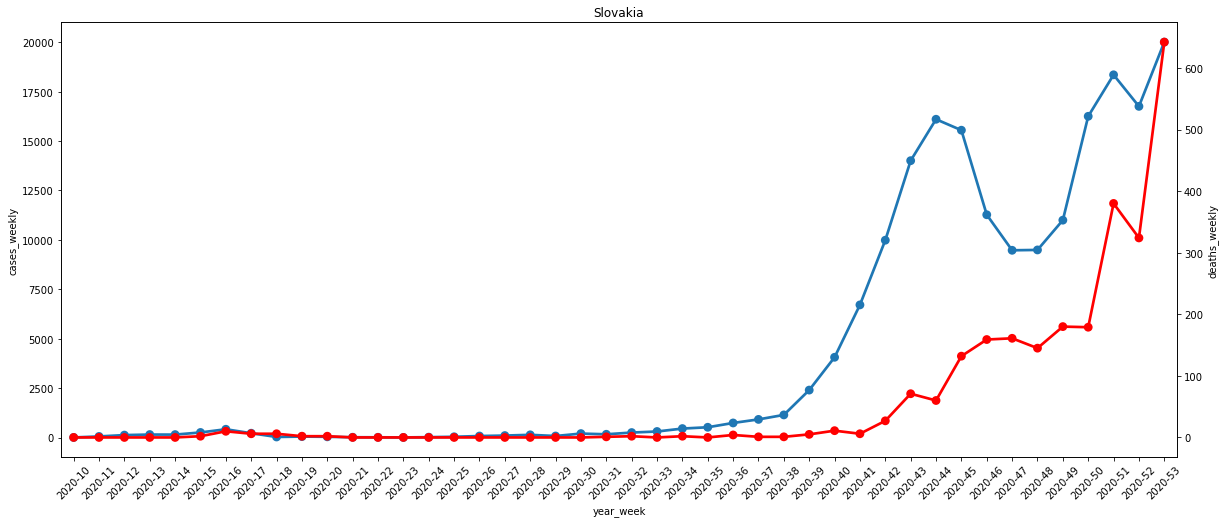

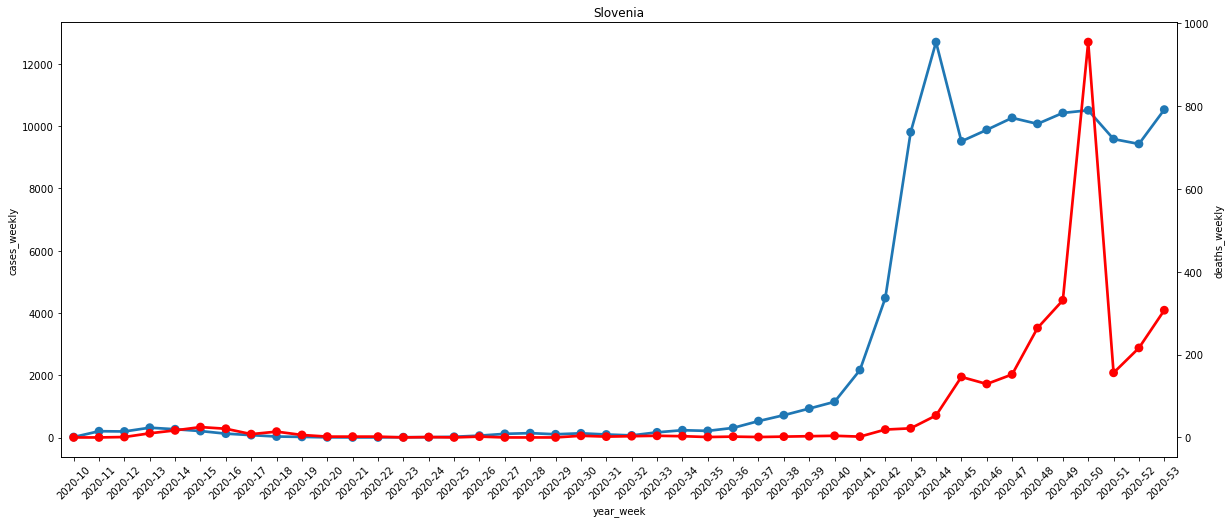

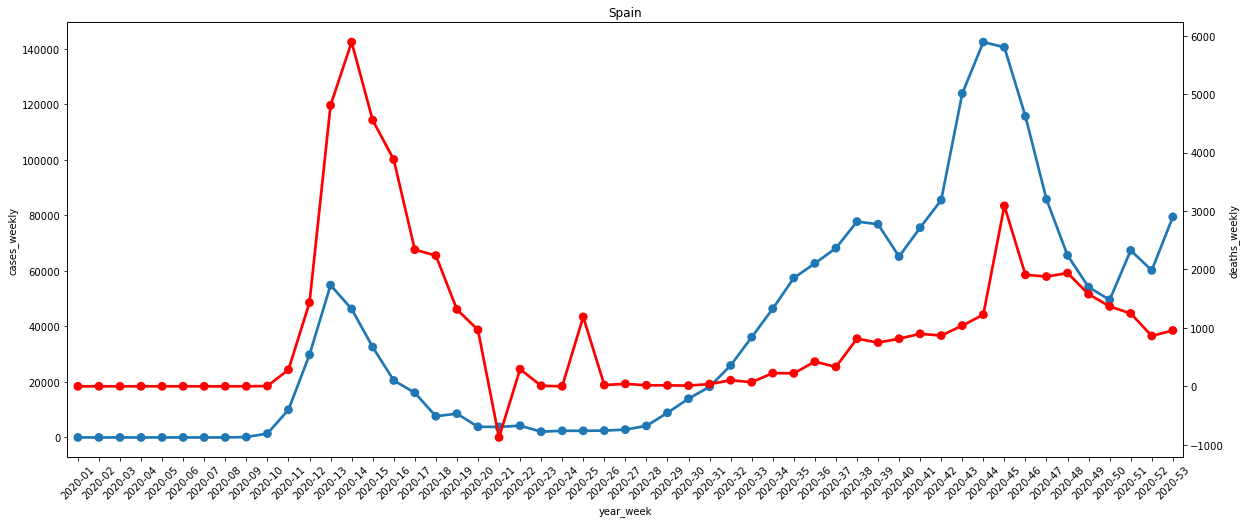

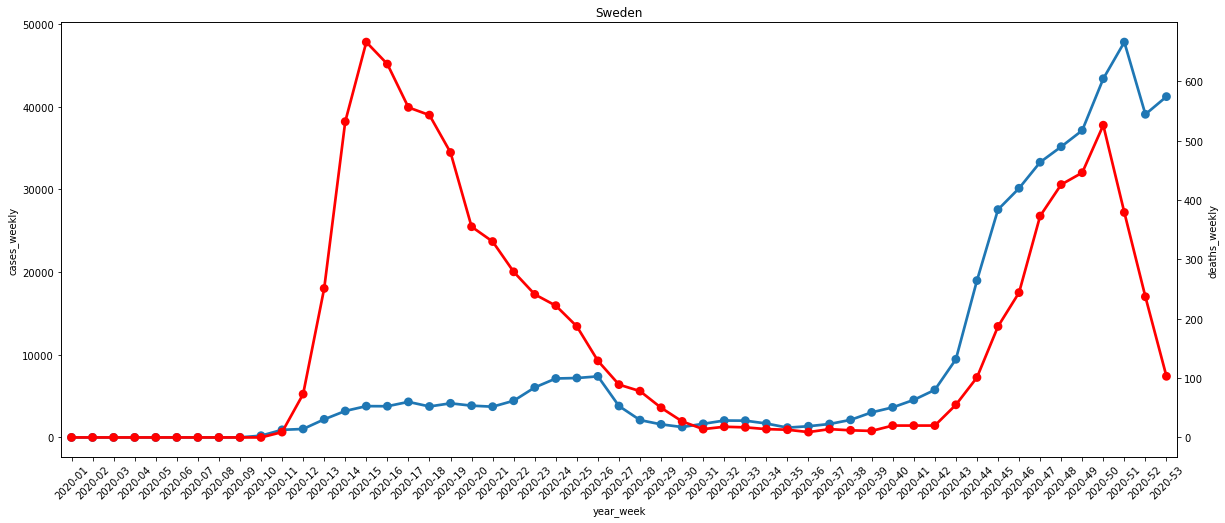

In [150]:
for i in country_list:
    plt.figure(figsize=(20,8))
    plt.xticks(rotation='45')
    ax=sns.pointplot(x='year_week', data=df_Europe[df_Europe['countriesAndTerritories']==i], y='cases_weekly')
    ax2=ax.twinx()
    sns.pointplot(x='year_week', data=df_Europe[df_Europe['countriesAndTerritories']==i], y='deaths_weekly', ax=ax2, color='r')
    plt.title(str(i))
    plt.show();

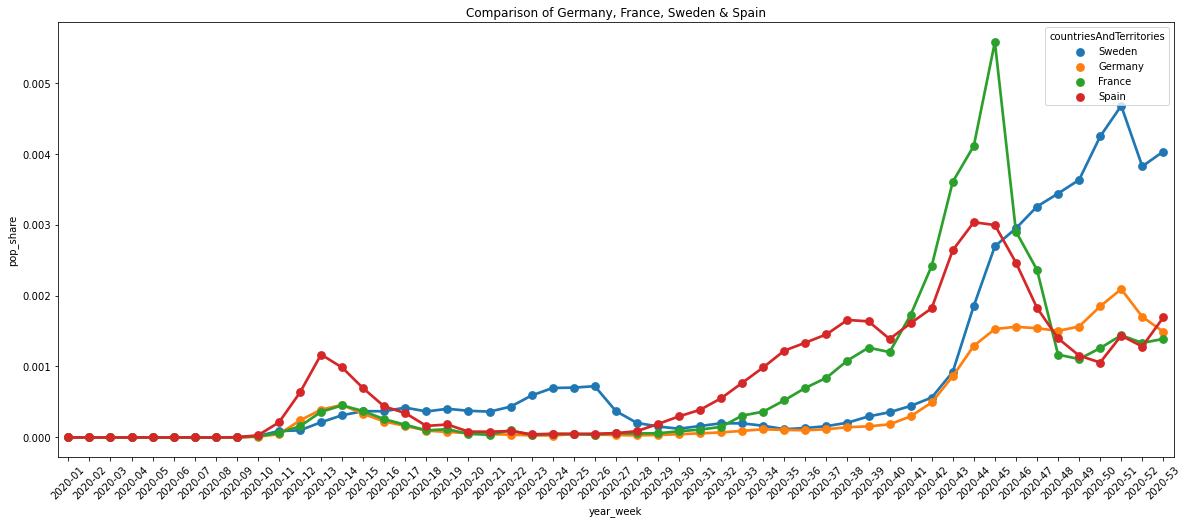

In [151]:
    df_Europe['pop_share']=df_Europe['cases_weekly']/df_Europe['popData2019']
    
    plt.figure(figsize=(20,8))
    plt.xticks(rotation='45')
    palette = itertools.cycle(sns.color_palette())
    df_selected = df_Europe[df_Europe['countriesAndTerritories'].isin(['Germany', 'France', 'Sweden', 'Spain'])].sort_values(by='year_week')
    sns.pointplot(x='year_week', data=df_selected, y='pop_share', hue='countriesAndTerritories')
    plt.title('Comparison of Germany, France, Sweden & Spain')
    plt.show()

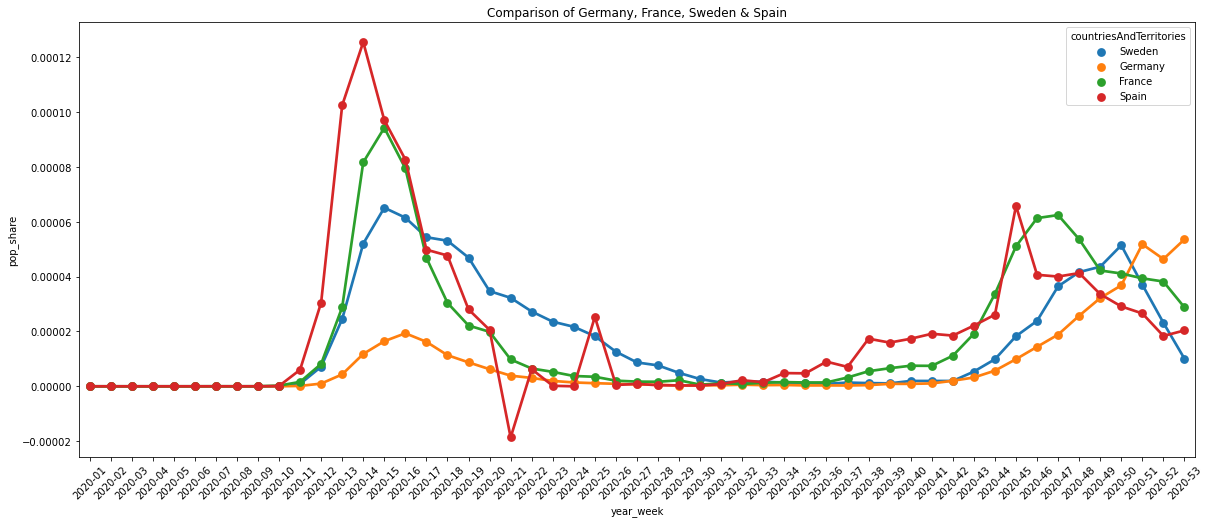

In [152]:
    df_Europe['pop_share']=df_Europe['deaths_weekly']/df_Europe['popData2019']

    plt.figure(figsize=(20,8))
    plt.xticks(rotation='45')
    palette = itertools.cycle(sns.color_palette())
    df_selected = df_Europe[df_Europe['countriesAndTerritories'].isin(['Germany', 'France', 'Sweden', 'Spain'])].sort_values(by='year_week')
    sns.pointplot(x='year_week', data=df_selected, y='pop_share', hue='countriesAndTerritories')
    plt.title('Comparison of Germany, France, Sweden & Spain')
    plt.show()

In [153]:
    df_selected= df_Europe[df_Europe['countriesAndTerritories'].isin(['Germany', 'France', 'Sweden', 'Spain'])] # change selection according to the focus of analysis
    #print(df_selected['countriesAndTerritories'] =='Austria')
    df_selected= df_selected[df_selected['year_week'] > '2020-40'] #### Change filter for longer time windows
    df_selected = df_selected.sort_values(by=['year_week', 'countriesAndTerritories'])
    #df_selected.head()

In [154]:
import datetime
from datetime import date
df_selected['year_week_format'] = df_selected['year_week'].apply(lambda x: datetime.datetime.strptime(x + '-1',"%Y-%W-%w"))
df_selected['month'] = df_selected['year_week_format'].apply(lambda x: datetime.datetime.strftime(x, "%B"))
df_selected['month'].value_counts()
month_dict=pd.Series(df_selected.month.values,index=df_selected.year_week).to_dict()
print(month_dict)

{'2020-41': 'October', '2020-42': 'October', '2020-43': 'October', '2020-44': 'November', '2020-45': 'November', '2020-46': 'November', '2020-47': 'November', '2020-48': 'November', '2020-49': 'December', '2020-50': 'December', '2020-51': 'December', '2020-52': 'December', '2020-53': 'January'}


In [155]:
df_selected['deaths_share']=df_selected['deaths_weekly']/df_selected['popData2019']
df_selected['cases_share']=df_selected['cases_weekly']/df_selected['popData2019']
df_selected.describe()
df_selected=df_selected.rename(columns={'countriesAndTerritories': "Country"})

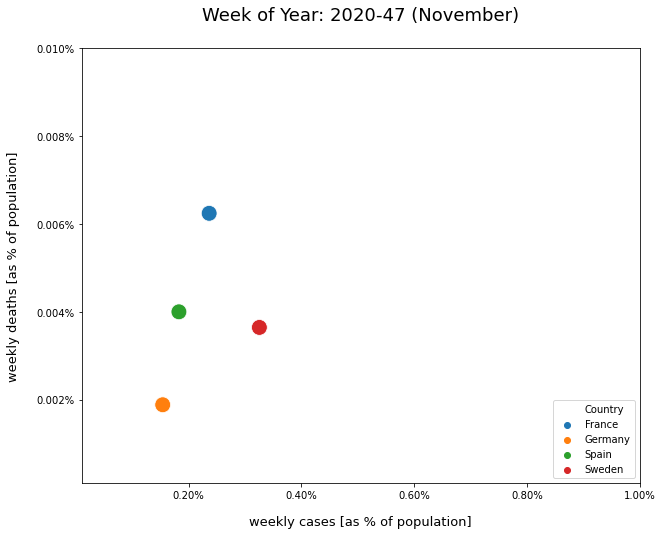

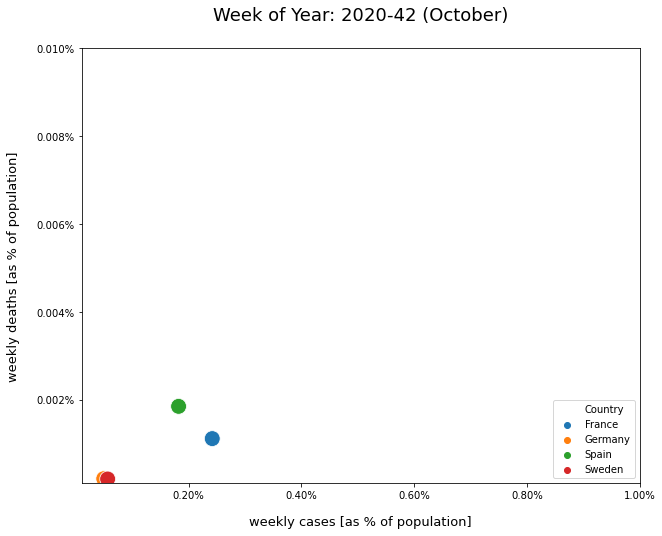

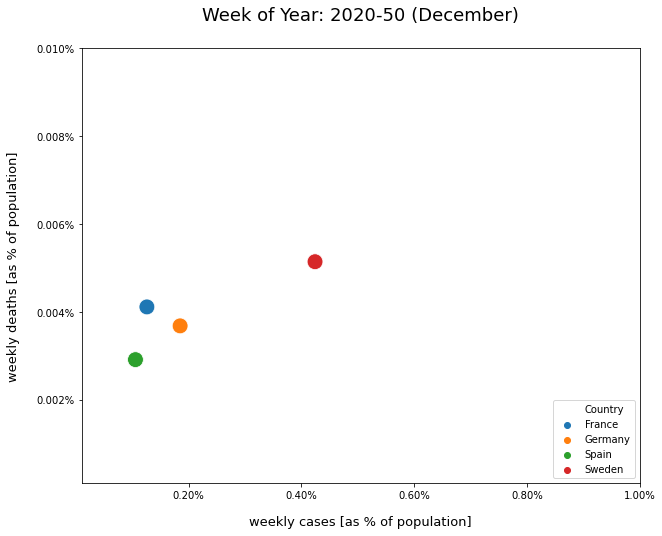

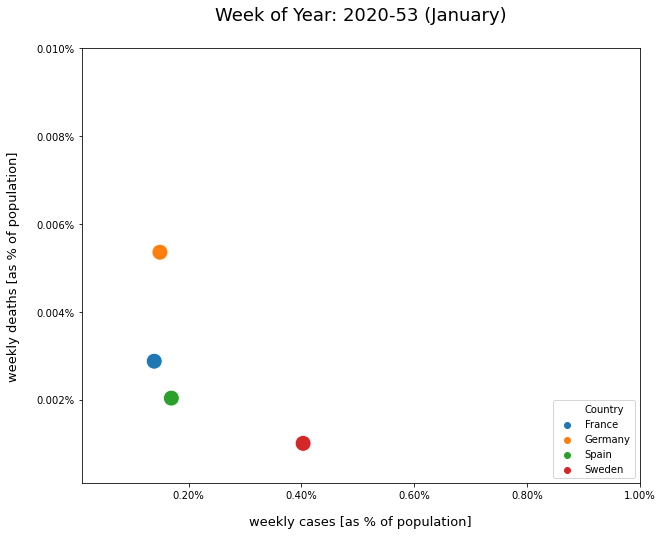

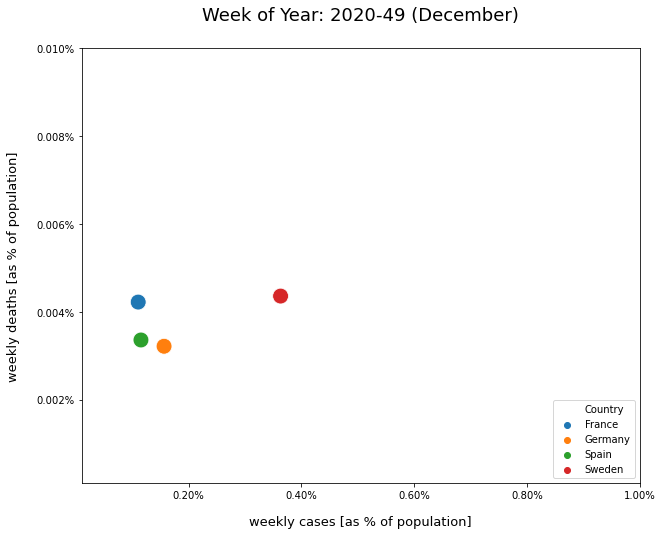

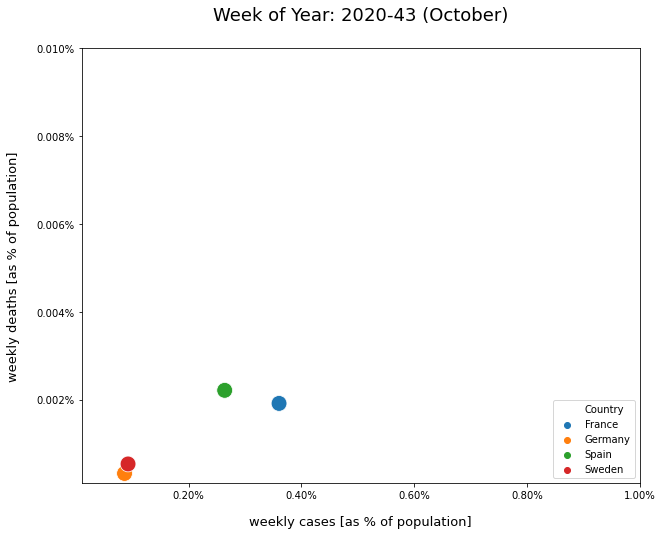

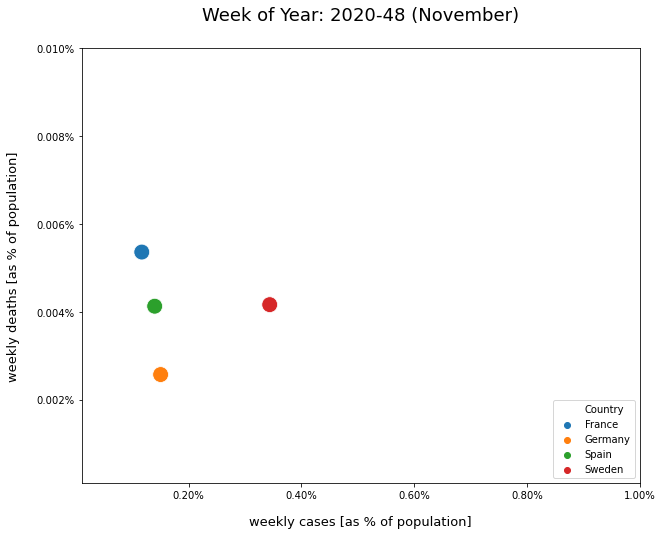

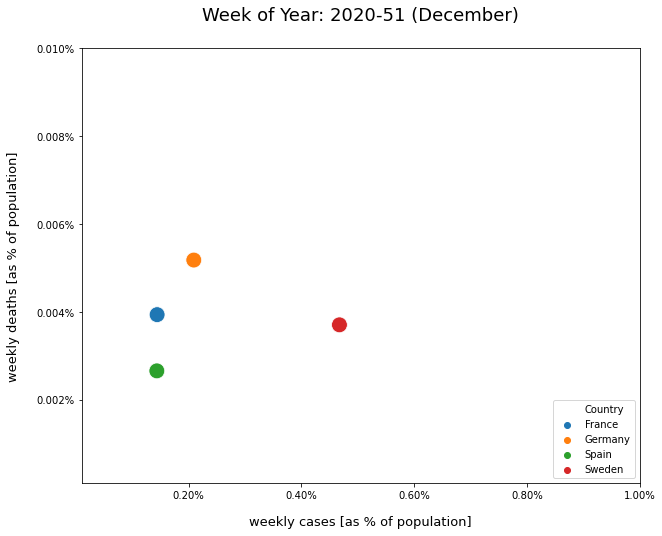

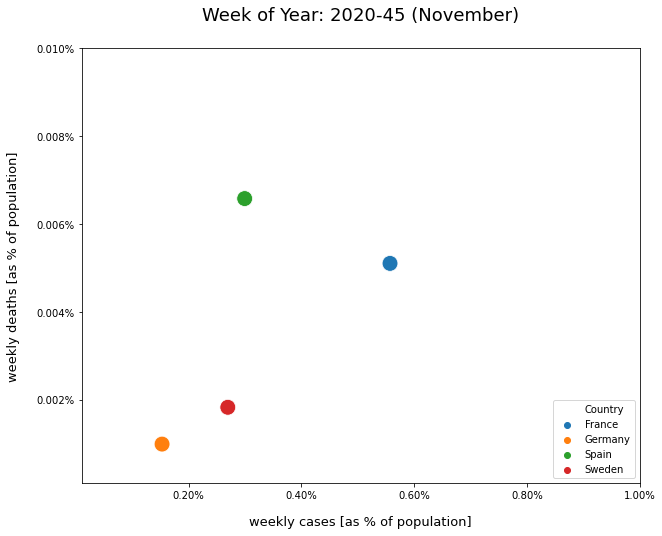

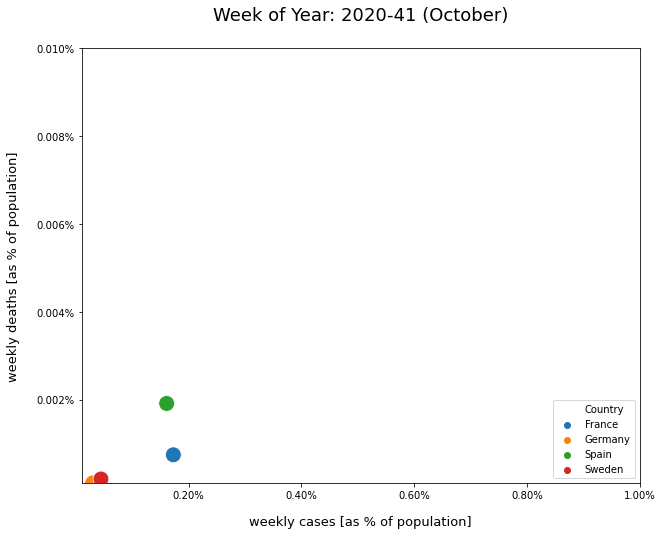

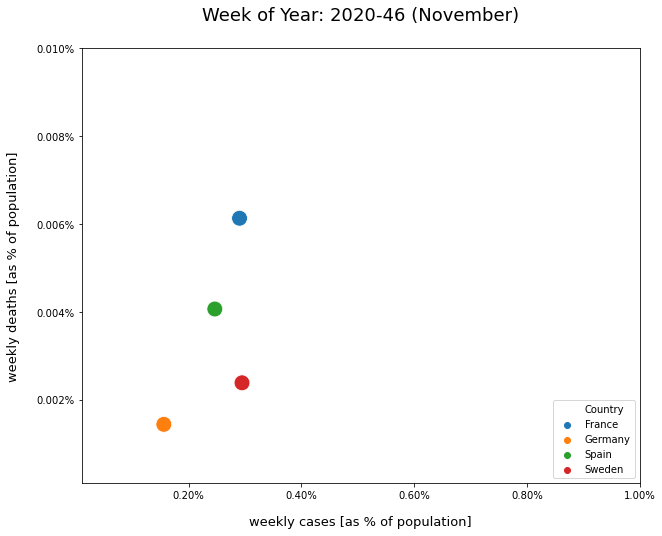

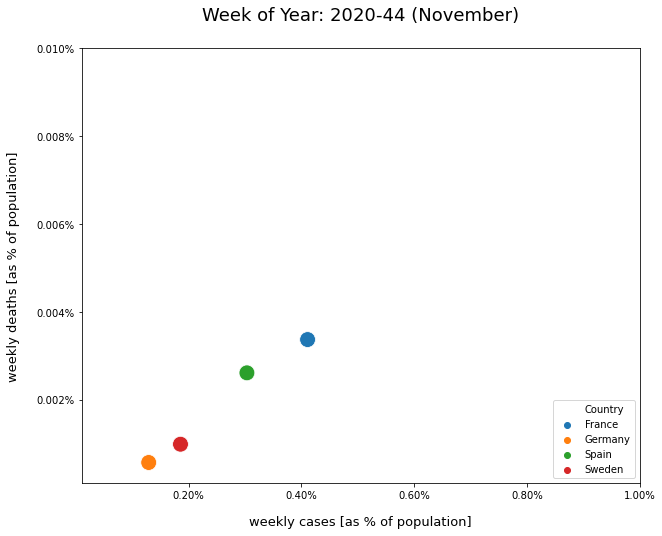

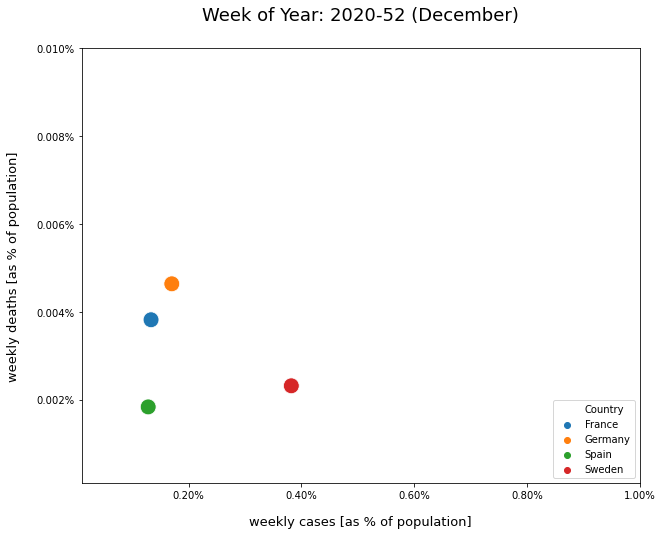

In [156]:
  ### Create a set of png files that will be used to generate a GIF in the next steps 
  for i in set(df_selected['year_week']):
        plt.figure(figsize=(10,8))
        ax=sns.scatterplot(x='cases_share', data=df_selected[df_selected['year_week']==i], y='deaths_share', hue='Country', s=250)
        #plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
        plt.legend(loc=4) #, title="Country", fontsize='small', fancybox=True)
        plt.ylim(0.000001,0.0001)
        plt.xlim(0.0001,0.01)
        yticks = ax.get_yticks()
        ax.set_yticklabels(['{:,.3%}'.format(x) for x in yticks])
        ax.xaxis.set_label_coords(0.5, -0.075)
        ax.set_xlabel('weekly cases [as % of population]', fontsize = 13)
        ax.yaxis.set_label_coords(-0.11, 0.5)
        ax.set_ylabel('weekly deaths [as % of population]', fontsize = 13)
        ax.set_title('Week of Year: ' + i + ' (' + month_dict[i] +')', x=0.5, y=1.05, fontsize = 18)
        #leg = ax.axes.get_legend()
        #leg.set_title("ddd")
        xticks = ax.get_xticks()
        ax.set_xticklabels(['{:,.2%}'.format(x) for x in xticks])
        plt.savefig(f'cases_deaths_{i}')

In [157]:
### Create GIF based on the above graphs

import imageio

images = []

for i in sorted(set(df_selected['year_week'])):
    filename = 'cases_deaths_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=2)

In [158]:
### Remove png-files used to generate GIF
import os
for i in sorted(set(df_selected['year_week'])):
    os.remove('cases_deaths_{}.png'.format(i))

In [159]:
df_world = df.groupby('countriesAndTerritories')['deaths_weekly','cases_weekly'].sum()
df_world = df_world.reset_index()
#print(df.columns)
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   countriesAndTerritories  213 non-null    object 
 1   deaths_weekly            213 non-null    float64
 2   cases_weekly             213 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.1+ KB


The base code used to generate the Folium Worldmap was retrieved from:
https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

In [160]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="your_app_name")

def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan, np.nan

df_world['Latitude', 'Longitude'] = df_world['countriesAndTerritories'].apply(lambda x: geolocate(x))
df_world
df_world['Latitude'] = df_world.iloc[:,3].apply(lambda x: x[0])
df_world['Longitude'] = df_world.iloc[:,3].apply(lambda x: x[1])
df_world

countriesAndTerritories  deaths_weekly  cases_weekly  \
0               Afghanistan         2230.0       52909.0   
1                   Albania         1193.0       59438.0   
2                   Algeria         2772.0      100408.0   
3                   Andorra           84.0        8192.0   
4                    Angola          408.0       17642.0   
..                      ...            ...           ...   
208       Wallis_and_Futuna            0.0           4.0   
209          Western_Sahara            1.0         766.0   
210                   Yemen          611.0        2105.0   
211                  Zambia          398.0       21993.0   
212                Zimbabwe          380.0       15265.0   

         (Latitude, Longitude)   Latitude  Longitude  
0     (33.7680065, 66.2385139)  33.768006  66.238514  
1      (41.000028, 19.9999619)  41.000028  19.999962  
2      (28.0000272, 2.9999825)  28.000027   2.999983  
3      (42.5407167, 1.5732033)  42.540717   1.573203  
4    (-11.8775768, 17.5691241) -11.877577  17.569124  
..                         ...        ...        ...  
208                 (nan, nan)        NaN        NaN  
209                 (nan, nan)        NaN        NaN  
210   (16.3471243, 47.8915271)  16.347124  47.891527  
211  (-14.5186239, 27.5599164) -14.518624  27.559916  
212  (-18.4554963, 29.7468414) -18.455496  29.746841  

[213 rows x 6 columns]

In [161]:
df_map=df_world.copy().dropna(how='any')
def place_value(number): 
    return ("{:,}".format(int(number))) 

# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster

#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of user percent
for i in range(len(df_map)):
        lat = df_map.iloc[i]['Latitude']
        long = df_map.iloc[i]['Longitude']
        radius=20
        popup_text = """Country : {}<br>
                    totel cases : {}<br>
                    total deaths : {}<br>"""
        popup_text = popup_text.format(df_map.iloc[i]['countriesAndTerritories'], place_value(df_map.iloc[i]['cases_weekly']),
                                   place_value(df_map.iloc[i]['deaths_weekly'])
                                   )
        popup_text = folium.Popup(popup_text, max_width=1000, min_width=100)
        folium.CircleMarker(location = [lat, long], radius=radius, popup=popup_text, fill =True).add_to(marker_cluster)
        

#show the map
world_map
world_map.save('world_map.html')
world_map.save('world_map.png')

In [162]:
import pandas as pd
pd.options.plotting.backend = "plotly"
df[df['popData2019'].isna()]

dateRep year_week  \
1112  04/01/2021,2020-53,58,0,"Bonaire, Saint Eustat...       NaN   
1113  28/12/2020,2020-52,4,0,"Bonaire, Saint Eustati...       NaN   
1114  21/12/2020,2020-51,6,0,"Bonaire, Saint Eustati...       NaN   
1115  14/12/2020,2020-50,9,0,"Bonaire, Saint Eustati...       NaN   
1116  07/12/2020,2020-49,3,0,"Bonaire, Saint Eustati...       NaN   
...                                                 ...       ...   
9412                                         16/11/2020   2020-46   
9413                                         09/11/2020   2020-45   
9414                                         02/11/2020   2020-44   
9415                                         26/10/2020   2020-43   
9416                                         19/10/2020   2020-42   

      cases_weekly  deaths_weekly countriesAndTerritories geoId  \
1112           NaN            NaN                     NaN   NaN   
1113           NaN            NaN                     NaN   NaN   
1114           NaN            NaN                     NaN   NaN   
1115           NaN            NaN                     NaN   NaN   
1116           NaN            NaN                     NaN   NaN   
...            ...            ...                     ...   ...   
9412           0.0            0.0       Wallis_and_Futuna    WF   
9413           0.0            0.0       Wallis_and_Futuna    WF   
9414           0.0            0.0       Wallis_and_Futuna    WF   
9415           0.0            0.0       Wallis_and_Futuna    WF   
9416           1.0            0.0       Wallis_and_Futuna    WF   

     countryterritoryCode  popData2019 continentExp  \
1112                  NaN          NaN          NaN   
1113                  NaN          NaN          NaN   
1114                  NaN          NaN          NaN   
1115                  NaN          NaN          NaN   
1116                  NaN          NaN          NaN   
...                   ...          ...          ...   
9412                  NaN          NaN      Oceania   
9413                  NaN          NaN      Oceania   
9414                  NaN          NaN      Oceania   
9415                  NaN          NaN      Oceania   
9416                  NaN          NaN      Oceania   

      notification_rate_per_100000_population_14-days  
1112                                              NaN  
1113                                              NaN  
1114                                              NaN  
1115                                              NaN  
1116                                              NaN  
...                                               ...  
9412                                              NaN  
9413                                              NaN  
9414                                              NaN  
9415                                              NaN  
9416                                              NaN  

[61 rows x 10 columns]

In [163]:
import plotly as plotly
import plotly.express as px
import plotly.graph_objs as go    
import math

#df_bubble=df.copy().rename(columns={'continentExp': 'Continent'})
#df_bubble['deaths_share']=df_bubble['deaths_weekly']/df_bubble['popData2019']
#df_bubble['cases_share']=df_bubble['cases_weekly']/df_bubble['popData2019']
#df_bubble=df_bubble.groupby(['Continent','countriesAndTerritories','popData2019'])['deaths_weekly','cases_weekly'].mean()
#df_bubble=df_bubble.reset_index()
df_bubble=df.copy().dropna(how='any').sort_values(by="year_week")
df_bubble=df_bubble.rename(columns={'continentExp': 'Continent'})
df_bubble=df_bubble.rename(columns={'year_week': 'Calendar Year-Week'})
df_bubble=df_bubble[df_bubble['Calendar Year-Week'] > "2020-10"]
df_bubble=df_bubble[(df_bubble['deaths_weekly'] > 0) & (df_bubble['cases_weekly'] > 0)]
df_bubble["cases_weekly"]=df_bubble["cases_weekly"].apply(lambda x: math.floor(x))
df_bubble["deaths_weekly"]=df_bubble["deaths_weekly"].apply(lambda x: math.floor(x))

fig = px.scatter(df_bubble, x="cases_weekly", y="deaths_weekly", animation_frame="Calendar Year-Week", animation_group="countriesAndTerritories", size="popData2019", color="Continent", hover_name="countriesAndTerritories", log_x=True, log_y=True, size_max=40, range_x=[1, df_bubble['cases_weekly'].max()], range_y=[1, df_bubble['deaths_weekly'].max()], labels={
                     "cases_weekly": "Weekly Cases",
                     "deaths_weekly": "Weekly Deaths ",
                     "popData2019": "Total Population in 2019"
                 }, hover_data={"popData2019": ":,", 'cases_weekly':':,.0f','deaths_weekly':':,.0f'})
fig.update_layout(
    width=1200,
    height=800,
    title={'text': r"""Covid-19 Cases and Deaths Across Countries/Continents <br> [March 2020 to January 2021]""", 
    'xanchor': 'center', 'y':0.965, 'x':0.5}
    )
fig.update_traces(textposition='top center')
fig.show()
fig.write_html('interactive_cases.html')
imageio.mimsave('output2.gif', fig, fps=2)

ValueError: Image is not numeric, but str.

In [ ]:
import plotly.graph_objects as go # or plotly.express as px
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
    #,dcc.Graph(id='graph2', figure=world_map)
    #,dcc.Graph(id='graph3', figure=images)
])

#if __name__ == '__main__':
app.run_server(debug=True, use_reloader=False)

In [ ]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output, State
# import plotly.express as px
# import plotly.graph_objects as go

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.P("Figure Width"),
#     dcc.Slider(id='width', min=200, max=500, step=25, value=300,
#                marks={x: str(x) for x in [200, 300, 400, 500]}),
#     dcc.Graph(id="graph", figure=fig),
# ])

# @app.callback(
#     Output("graph", "figure"), 
#     [Input('width', 'value')], 
#     [State("graph", "figure")])
# def resize_figure(width, fig_json):
#     fig = go.Figure(fig_json)

# app.run_server(debug=True, use_reloader=False)